In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)

In [3]:
# Step 2: Data Exploration 
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
# Step 3: Data Cleaning
# Assuming you have identified irrelevant columns, drop them.
irrelevant_columns = ['Unnamed: 0']
df_cleaned = df.drop(columns=irrelevant_columns)

In [6]:
# Step 4: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.iloc[:, 1:])  # Exclude the "Location" column from scaling


In [7]:
# Step 5: Clustering
# Choose the number of clusters (k) based on your problem.
k = 3  # You can adjust this value based on your requirements.

kmeans = KMeans(n_clusters=k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(scaled_data)


c:\Users\kalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
# Step 6: Visualization and Interpretation
# Use PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)


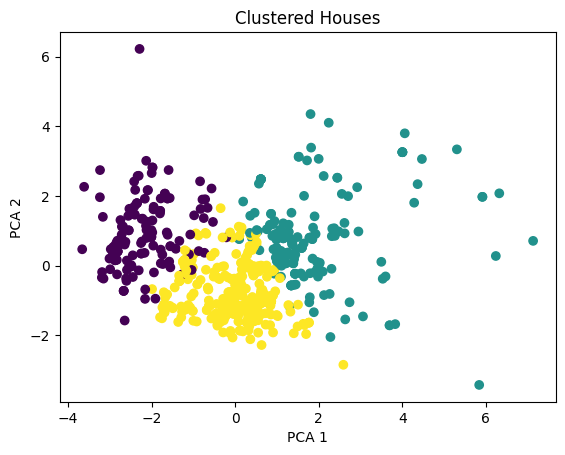

In [9]:
# Create a scatter plot to visualize the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_cleaned['Cluster'], cmap='viridis')
plt.title('Clustered Houses')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [10]:

# Step 7: Interpretation
# Analyze the characteristics of each cluster and understand what makes them similar.
# You can do this by examining the cluster centroids or other relevant statistics.
for cluster_id in range(k):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data.describe())

Cluster 0:
              Sqft       Floor  TotalFloor     Bedroom  Living.Room  \
count   132.000000  132.000000  132.000000  132.000000   132.000000   
mean    801.304727    6.537879   10.780303    1.583333     1.075758   
std     314.171626    3.609583    4.207072    0.654307     0.421216   
min     359.358000    1.000000    1.000000    1.000000     0.000000   
25%     590.628000    4.000000    7.000000    1.000000     1.000000   
50%     736.506000    6.000000   12.000000    1.500000     1.000000   
75%     906.400500    8.250000   14.000000    2.000000     1.000000   
max    1885.740000   22.000000   26.000000    4.000000     2.000000   

         Bathroom         Price  Cluster  
count  132.000000    132.000000    132.0  
mean     1.068182  36828.272727      0.0  
std      0.281576  12861.954093      0.0  
min      0.000000  11900.000000      0.0  
25%      1.000000  28000.000000      0.0  
50%      1.000000  35000.000000      0.0  
75%      1.000000  45000.000000      0.0  
max  

c:\Users\kalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

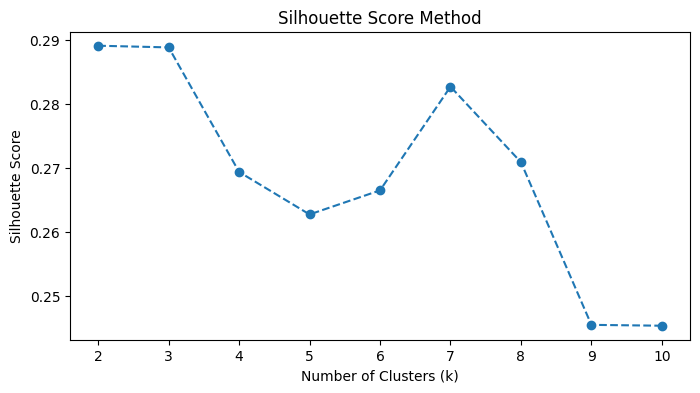

In [11]:
#2. Finding the optimal value of k
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Try different values of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score graph
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [12]:
#3. Storing cluster to which the house belongs along with the data
# Create a new column 'Cluster' to store the cluster assignments
df['Cluster'] = df_cleaned['Cluster']
